In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, linregress
from datetime import date

In [2]:
filename = 'data/temp_datalab_records_linkedin_company.csv'
df = pd.read_csv(filename)#, parse_dates=True)#, index_col='DATE')
df['as_of_date'] = pd.to_datetime(df['as_of_date'])
df.rename(columns={ 'as_of_date': 'date'}, inplace=True)
display(df.head())

/Users/Strawberry/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [3]:
# range of the dates
print(df['date'].min())
print(df['date'].max())

2015-09-14 00:00:00
2018-07-17 00:00:00


## Increasing Speed of Employee Numbers

Let's define the slope as the increasing number of employees per day. We group the data by company names, and find the slope for each company.

,slope
company_name,
Hewlett-Packard,527.105346
Marriott International,238.200121
Amazon,169.909662
IBM,169.873137
Walmart,157.842788
McDonald's,148.224039
TOTAL,132.724378
TechnipFMC,126.321377
Hilton,123.594599


<Figure size 432x288 with 0 Axes>

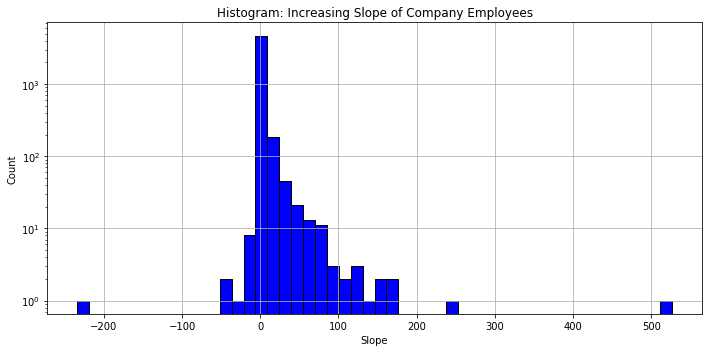

In [4]:
def slope(x):
    if len(x)<2:
        return np.nan
    x1 = x['date'].values # remove index, since it may not start from 0
    x1 = (x1-x1[0]).astype('timedelta64[D]').astype(int)
    x2 = x['employees_on_platform'].values
    return linregress(x1,x2)[0]

df_slope = df.groupby('company_name').apply(lambda x: slope(x))
df_slope = pd.DataFrame(df_slope)
df_slope.columns = ['slope']
df_slope = df_slope.sort_values('slope', ascending=False)
display(df_slope.head(10))

plt.figure()
df_slope.hist(bins = 50, color = 'blue', edgecolor='black',log=True,figsize = (10,5))
plt.grid(True)
plt.title('Histogram: Increasing Slope of Company Employees')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Expand_Slope.png')

The 1st slope company Hewlett-Packard has an unbelievable increasing speed:

527.105346 employees / day

However, if we check the range of the dates for Hewlett-Packard:

In [5]:
print(df[df['company_name'] == 'Hewlett-Packard']['date'].min())
print(df[df['company_name'] == 'Hewlett-Packard']['date'].max())

2015-09-16 00:00:00
2015-10-26 00:00:00


We find that it just increased fast in a short period (40 days), so slope may not be a good indicator to find the companies with large expansion.


## Number of Increased Employees

Let's check the increased number of employees from 2015-09-14 to 2018-07-17. We group the data by company names, and find the difference of employee numbers between the last day and the first day. We sort the data by decending order of expansions.

In [6]:
def expand(x):
    if len(x)<2:
        return np.nan, np.nan
    x1 = x['employees_on_platform'].values
    if x1[0] == 0:
        return x1[-1], np.nan
    expand_num = x1[-1] - x1[0]
    expand_ratio = expand_num/x1[0]
    return expand_num, expand_ratio

df_expand = df.groupby('company_name').apply(lambda x: expand(x))
df_expand = pd.DataFrame(df_expand)
df_expand.columns = ['expansion']
df_expand['expand_num'], df_expand['expand_ratio'] = list(zip(*df_expand['expansion'].values))
df_expand.drop(columns=['expansion'], inplace= True)

df_expand = df_expand.sort_values('expand_num', ascending=False)
display(df_expand.head(20))


,expand_num,expand_ratio
company_name,,
Walmart,181442.0,0.790146
Amazon,176769.0,2.087716
IBM,163813.0,0.395551
Accenture,122157.0,0.473460
McDonald's,119906.0,1.160497
Marriott International,115879.0,1.861959
Cognizant,85812.0,0.543995
Ford Motor Company,84251.0,1.024702
Apple,82126.0,0.790251


<Figure size 432x288 with 0 Axes>

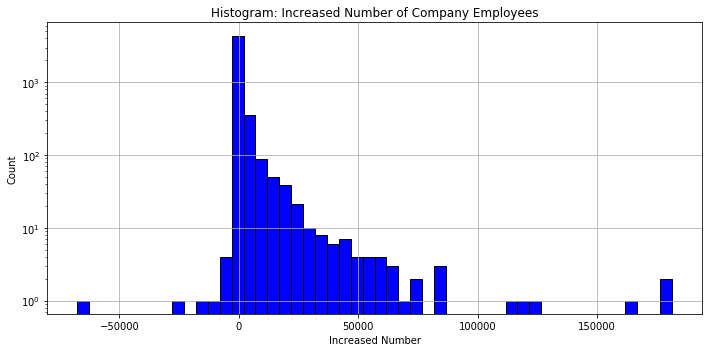

In [7]:
plt.figure()
df_expand[['expand_num']].hist(bins = 50, color = 'blue', edgecolor='black',log=True,figsize = (10,5))
plt.grid(True)
plt.title('Histogram: Increased Number of Company Employees')
plt.xlabel('Increased Number')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Expand_Number.png')


Let check the dates range of the 1st company Walmart

In [8]:
print(df[df['company_name'] == 'Walmart']['date'].min())
print(df[df['company_name'] == 'Walmart']['date'].max())

2015-09-16 00:00:00
2018-07-17 00:00:00


The date range covers a wide range (~ 3 years), thus we can compare this data with financial data.

## Company Names to Stock Names

In [9]:
df_name = df[['company_name','link','industry']].groupby('company_name').max()

In [10]:
df_name.to_csv('company_name.csv')

### Run the symbols.ipynb to generate the stock symbols and download historical data from Yahoo

In [184]:
df_symbols = pd.read_csv('symbols_keep.csv')
df_symbols.head()

,company_name,symbol
0,"1-800-FLOWERS.COM, INC.",FLWS
1,"21Vianet Group,Inc.",VNET
2,3D Systems Corporation,DDD
3,3M,MMM
4,51job,JOBS


In [185]:
names = df_symbols['company_name'].values
names

array(['1-800-FLOWERS.COM, INC.', '21Vianet Group,Inc.',
       '3D Systems Corporation', ..., 'tuniu.com', 'uniQure',
       'voxeljet AG'], dtype=object)

In [186]:
symbols = df_symbols['symbol'].values
symbols

array(['FLWS', 'VNET', 'DDD', ..., 'TOUR', 'QURE', 'VJET'], dtype=object)

In [37]:
names_20 = np.concatenate((df_expand.index[:10].values, df_expand.index[10-1:20].values))
symbols_20 = np.array(['WMT','AMZN','IBM','ACN','MCD','MAR','CTSH','F','AAPL','GOOG','GOOGL',
                   'JPM','HSBC','VOD','C','BAC','S','SBUX','GE','T','WFC'])

for i in range(len(symbols_20)):
    symbol = symbols_20[i]
    name = names_20[i]
    if symbol not in symbols:
        symbols = np.append(symbols, symbol)
        names = np.append(names, name)

print(np.transpose(np.concatenate(([names_20], [symbols_20]), axis=0)))

[['Walmart' 'WMT']
 ['Amazon' 'AMZN']
 ['IBM' 'IBM']
 ['Accenture' 'ACN']
 ["McDonald's" 'MCD']
 ['Marriott International' 'MAR']
 ['Cognizant' 'CTSH']
 ['Ford Motor Company' 'F']
 ['Apple' 'AAPL']
 ['Google' 'GOOG']
 ['Google' 'GOOGL']
 ['JPMorgan Chase & Co.' 'JPM']
 ['HSBC' 'HSBC']
 ['Vodafone' 'VOD']
 ['Citi' 'C']
 ['Bank of America' 'BAC']
 ['Sprint' 'S']
 ['Starbucks' 'SBUX']
 ['GE' 'GE']
 ['AT&T' 'T']
 ['Wells Fargo' 'WFC']]


Above is the list of top 20 companies and respective stock symbol.

Please notice that Google has 2 stocks: GOOG, GOOGL



## For Amazon, Compare the Number of Employees and Stock Price

From the previous result, we found that Amazon has the highest expand ratio among the top 20 expansion companies.

Here let's explore the relation between number of employees and stock price for Amazon.

We get the stock data of Amazon from Yahoo Finance (https://finance.yahoo.com). Then we create a data table including the stock price and number of employees on each date.

In [153]:
# filename = 'data/stocks/^GSPC.csv' # get full dates from SP 500
# df_sp = pd.read_csv(filename, parse_dates=True, index_col='Date')
# dates = df_sp.index.values

df1 = df[df['company_name'] == 'Amazon'].copy()
df1.set_index('date', inplace = True)
# if len(df1[df1['employees_on_platform'].notnull()])==0:
#     continue
start = df1[df1['employees_on_platform'].notnull()].index.values[0] # dates range
end = df1[df1['employees_on_platform'].notnull()].index.values[-1]

filename = 'data/stocks/AMZN.csv'
df1_stock = pd.read_csv(filename, parse_dates=True, index_col='Date')
# start = df1_stock.index.values[0]
# end = df1_stock.index.values[-1]
# dates1 = dates[(dates >= start) & (dates <= end)]

df1_stock['employees_on_platform'] = df1['employees_on_platform'] 
# df1['price'] = df1_stock['Adj Close']
# df1.head()

iwant = (df1_stock.index.values >= start) & (df1_stock.index.values <= end)
df1_stock = df1_stock[iwant]
df1_stock = df1_stock.ffill() # fill forward
df1_stock[['employees_on_platform','Adj Close']].head()

,employees_on_platform,Adj Close
Date,,
2015-09-16,84671.0,527.390015
2015-09-17,84716.0,538.869995
2015-09-18,84809.0,540.260010
2015-09-21,74643.0,548.390015
2015-09-22,74780.0,538.400024


Notice the stock market is only open on weekdays, so we drop the weekends ( on which the stock prices are NaN ). For the purpose of generalization, we scale the number of employees and stock prices by dividing the first value.

<Figure size 432x288 with 0 Axes>

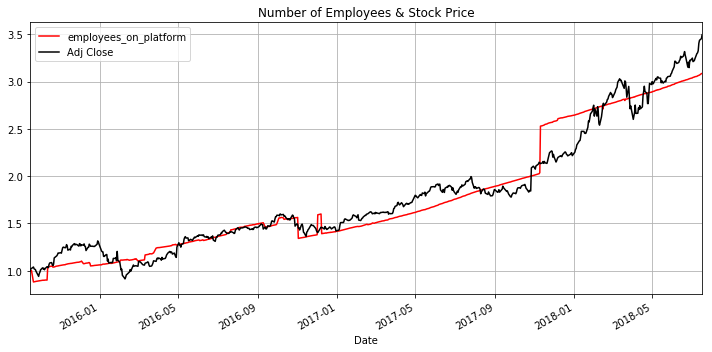

In [154]:
df_plot = df1_stock[['employees_on_platform','Adj Close']].copy()
df_plot = df_plot[df_plot['Adj Close'].notnull()]
df_plot.dropna(inplace = True)
df_plot = df_plot/df_plot.iloc[0]

plt.figure()
df_plot.plot(color = ['red','black'], figsize = (10,5))
plt.grid(True)
plt.legend()
plt.title('Number of Employees & Stock Price')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig('Employees_Price_Amazon.png')

We can see that the number of employees and stock price of Amazon are correlated quite well. Below is the correlation matrix.

In [156]:
np.corrcoef(df_plot['employees_on_platform'].values,df_plot['Adj Close'].values)

array([[1.        , 0.97357208],
       [0.97357208, 1.        ]])

## Find an Indicator for Stock Price
High correlation coefficient is not enough for a market indicator. Because we want the predictor in front of the market, thus we can use it to predict the market. Now let's consider the correlation with Leading days:


### Leading 
If the date of indicator is leading the date of stock, we say the Leading days > 0, and high correlation leads to a good indicator to predict the stock price. Based the efficient-market hypothesis (EMH), if less people use this indicator, the indicator is more likely a private information, and can be used to get profit in semi-strong or weak efficient markets.

### Lagging
If the date of indicator is lagging the date of stock, we say the Leading days < 0, and high correlation might be useless to predict the stock price. However, the stock price can be used to predict the company's expansion plan. A current employee knows that he/she may need to find another employer when the stock price goes down, while a job seeker knows that it is a good chance to join the company when the stock price goes up.

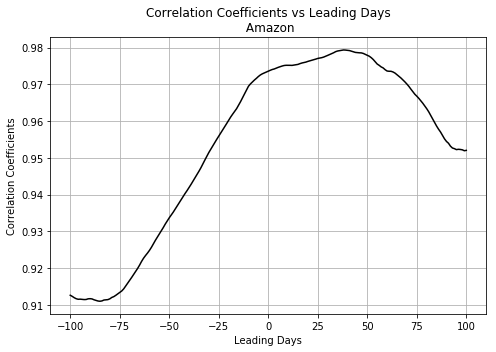

In [158]:
days = np.array([])
coefs = np.array([])
for i in range(-100,100+1):
    x = df_plot['employees_on_platform'].values
    y = df_plot['Adj Close'].values
    if i > 0: # x lead y
        x = x[:-i]
        y = y[i:]
    elif i < 0: # x lag y
        x = x[-i:]
        y = y[:i]
    c = np.corrcoef(x, y)[0,1]
    days = np.append(days,i)
    coefs = np.append(coefs,c)

plt.figure(figsize = (7,5))
plt.plot(days,coefs, color = 'black')
plt.title('Correlation Coefficients vs Leading Days\n Amazon')
plt.xlabel('Leading Days')
plt.ylabel('Correlation Coefficients')
plt.grid(True)
plt.tight_layout()
plt.savefig('Indicator_Amazon.png')

In [159]:
idx = np.argmax(coefs)
print('Highest correlation coefficients: %.10g' % coefs[idx])
print('With Leading days: %d' % days[idx] )

Highest correlation coefficients: 0.9793464295
With Leading days: 38


From the figure above, we can find that the number of employees is a quite good indicator  ( correlation coefficient = 0.97972886 ) to predict the stock price of Amazon 37 weekdays in the future.


## Indicator for Stocks of 1900+ Companies

In [188]:
corrcoefs = np.array([])
lag_days =  np.array([])

for i in range(len(names)):
    if i % 100 == 0:
        print(str(i)+'/'+str(len(names)))
    name = names[i]
    symbol = symbols[i]
    
    df1 = df[df['company_name'] == name].copy()
    df1.set_index('date', inplace = True)
    if len(df1[df1['employees_on_platform'].notnull()])==0:
        continue
    start = df1[df1['employees_on_platform'].notnull()].index.values[0] # dates range
    end = df1[df1['employees_on_platform'].notnull()].index.values[-1]
    # at least from 2016-1-1 to 2017-12-31
    if pd.to_datetime(start) > pd.to_datetime('2016-1-1'):
        continue
    if pd.to_datetime(end) < pd.to_datetime('2017-12-31'):
        continue

    filename = 'data/stocks/'+symbol+'.csv'
    df1_stock = pd.read_csv(filename, parse_dates=True, index_col='Date')
    #df1['price'] = df1_stock['Adj Close']
    df1_stock['employees_on_platform'] = df1['employees_on_platform'] 

    iwant = (df1_stock.index.values >= start) & (df1_stock.index.values <= end)
    df1_stock = df1_stock[iwant]
    df1_stock = df1_stock.ffill() # fill forward

    df_plot = df1_stock[['employees_on_platform','Adj Close']].copy()
    df_plot.dropna(inplace = True)
    if len(df_plot) < 500:
        continue
    df_plot = df_plot/df_plot.iloc[0]
    
    days = np.array([])
    coefs = np.array([])
#     for i in range(-300,300+1):
#         x = df_plot['employees_on_platform'].values
#         y = df_plot['price'].values
#         if i > 0: # x lead y
#             x = x[:-i]
#             y = y[i:]
#         elif i < 0: # x lag y
#             x = x[-i:]
#             y = y[:i]
    x0 = df_plot['employees_on_platform'].values
    y0 = df_plot['Adj Close'].values
    c = np.corrcoef(x0, y0)[0,1]
    days = np.append(days,0)
    coefs = np.append(coefs,c)
    for i in range(1,500+1):
        # x lead y
        x = x0[:-i]
        y = y0[i:]
        c = np.corrcoef(x, y)[0,1]
        days = np.append(days,i)
        coefs = np.append(coefs,c)
        # x lag y
        x = x0[i:]
        y = y0[:-i]
        c = np.corrcoef(x, y)[0,1]
        days = np.append(days,-i)
        coefs = np.append(coefs,c)    
    
    idx = np.argmax(coefs)
    lag_days = np.append(lag_days,days[idx])
    corrcoefs = np.append(corrcoefs,coefs[idx])

0/1915
100/1915
200/1915
300/1915
400/1915
500/1915
600/1915
700/1915
800/1915
900/1915
1000/1915
1100/1915
1200/1915
1300/1915
1400/1915
1500/1915
1600/1915
1700/1915
1800/1915
1900/1915


No handles with labels found to put in legend.


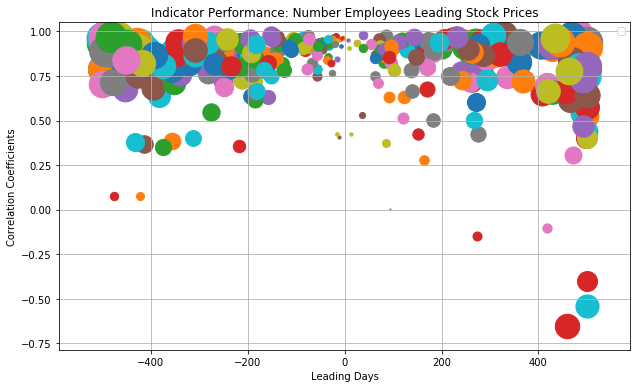

In [246]:
plt.figure(figsize = (9,5.5))
sizes = np.abs(lag_days * corrcoefs)*2
for i in range(len(lag_days)):
    plt.scatter(lag_days[i], corrcoefs[i], sizes[i])#, label = symbols[i])
plt.title('Indicator Performance: Number Employees Leading Stock Prices')
plt.xlabel('Leading Days')
plt.ylabel('Correlation Coefficients')
plt.ylim([None,1.05])
plt.legend(bbox_to_anchor=(1, 1),ncol=1)
plt.grid(True)
plt.tight_layout()
plt.savefig('Indicator_Performance.png')


In [255]:
len(x)

330

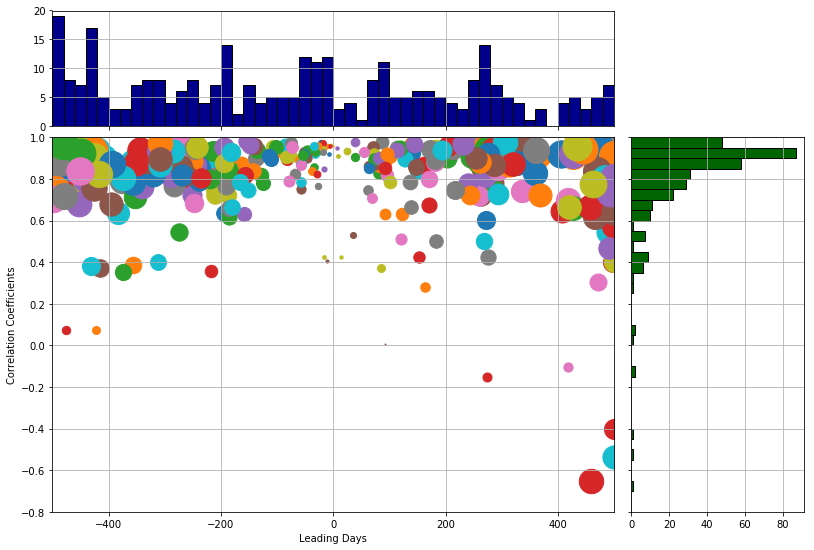

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = lag_days
y = corrcoefs
sizes = np.abs(lag_days * corrcoefs)*2

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
fontSize = 20
for i in range(len(x)):
    axScatter.scatter(x[i], y[i], sizes[i])#,color = 'darkblue')
axScatter.set_xlabel('Leading Days')
axScatter.set_ylabel('Correlation Coefficients')
axScatter.grid(True)

# now determine nice limits by hand:
binwidthx = 20
binwidthy = 0.05
xmax = np.max(np.fabs(x))
ymax = np.max(np.fabs(y))

limx = (int(xmax/binwidth) + 1) * binwidth
limy = (int(ymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-limx, limx))
axScatter.set_ylim((-0.8, limy))

binsx = np.arange(-limx, limx + binwidthx, binwidthx)
binsy = np.arange(-limy, limy + binwidthy, binwidthy)

axHistx.hist(x, bins=binsx, color = 'darkblue', edgecolor='black')
axHistx.grid(True)

#axHistx.set_title('               Indicator Performance: Number Employees Leading Stock Prices')
axHisty.hist(y, bins=binsy, color = 'darkgreen', edgecolor='black', orientation='horizontal')
axHisty.grid(True)

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.tight_layout()
plt.savefig('Indicator_Performance.png')


# The figure above shows the indicator performance of the stocks of top 20 expansion companies.


### Leading Indicator Companies

On the upper right of the graph, we can see that the numbers of employees lead the stocks of { AMZN, MCD, APPL, CTSH, GE } with high correlation coefficients (>0.85). People can use this indicator for trading among these stocks.


### Lagging Indicator Companies

On the upper left of the graph, we can see that the stock prices of { T, WMT, IBM, BAC, S, HSBC, JPM, GOOGL, WFC } lead the number of employees of corresponding companies, with high correlation coefficients (>0.8). The employees and job seekers can use this indicator to prepare to find new positions. 


## Next Step: Machine Learning Modeling

* Explore the indicator for all the 5028 companies, and 141 industry types in this dataset
* Focus on companies with long date range to build predictive models
* Split the date range into in sample period ( for training ) and out of sample period ( for testing )

* Leading modeling:
    select companies with high correlation coefficients leading indicators, and build a machine learning model to predict the stock price from the number of employees

* Lagging modeling:
    select companies with high correlation coefficients lagging indicators, and build a machine learning model to predict the number of employees from the stock price
  
* Explore the followers_count, and add it as an additional indicator into the models

In [241]:
!python3 S3.py

sys:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
   dataset_id       date            company_name  followers_count  \
0       58329 2015-09-14           Goldman Sachs           552254   
1       58329 2015-09-15           Goldman Sachs           552862   
2       58363 2015-09-16     United Technologies            59157   
3       58366 2015-09-16            Novo Nordisk           336175   
4       58371 2015-09-16  Lowe's Companies, Inc.           134255   

   employees_on_platform                                   link  \
0                  38124  https://www.linkedin.com/company/1382   
1                  38141  https://www.linkedin.com/company/1382   
2                  14982  https://www.linkedin.com/company/2426   
3                  26448  https://www.linkedin.com/company/2227   
4                  62574  https://www.linkedin.com/company/4128   

               industry              date_added            date_updated 

In [ ]:
dataset_id date company_name followers_count employees_on_platform link industry date_added date_updated description website entity_id cusip isin